In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os

In [58]:
train=pd.read_csv("train.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [59]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [60]:
train.shape

(614, 13)

Reading the test file and displaying it 

In [16]:
test=pd.read_csv('test.csv')

test.shape

(367, 12)

In [17]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Creating a submission file

In [18]:
submission = pd.DataFrame() # Create a submission dataframe
submission['Loan_ID'] = test['Loan_ID'] 

In [19]:
train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
294,LP001947,Male,Yes,0,Graduate,No,2383,3334.0,172.0,360.0,1.0,Semiurban,Y
376,LP002219,Male,Yes,3+,Graduate,No,8750,4996.0,130.0,360.0,1.0,Rural,Y
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
190,LP001653,Male,No,0,Not Graduate,No,4885,0.0,48.0,360.0,1.0,Rural,Y


In [21]:
train.drop(['Loan_ID'],axis=1,inplace=True) # Delete Loan_ID from training dataset 
test.drop(['Loan_ID'],axis=1,inplace=True)

Exploratory data analysis

In [30]:
#skewness plot
catpl=train.select_dtypes(include= [np.object])
catpl.head()

C:\Users\diyab\AppData\Local\Temp\ipykernel_312\4194083150.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  catpl=train.select_dtypes(include= [np.object])


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


C:\Users\diyab\AppData\Local\Temp\ipykernel_312\303887441.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.distplot(train.skew(),color="green",axlabel="Understanding data skewness")
C:\Users\diyab\AppData\Local\Temp\ipykernel_312\303887441.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train.skew(),color="green",axlabel="Understanding data skewness")


<Axes: xlabel='Understanding data skewness', ylabel='Density'>

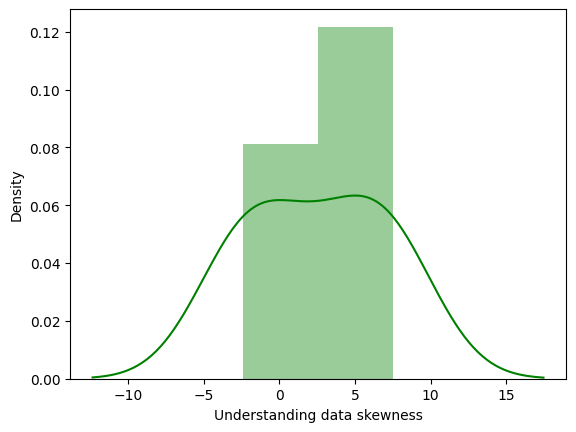

In [31]:
#plotting for skewed data
sns.distplot(train.skew(),color="green",axlabel="Understanding data skewness")

In [ ]:
from sklearn.impute import SimpleImputer

In [85]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train[['Credit_History','LoanAmount','Loan_Amount_Term']]=imputer.fit_transform(train[['Credit_History','LoanAmount','Loan_Amount_Term']])

stimp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train[['Self_Employed','Dependents','Gender','Married']]=stimp.fit_transform(train[['Self_Employed','Dependents','Gender','Married']])

<Axes: >

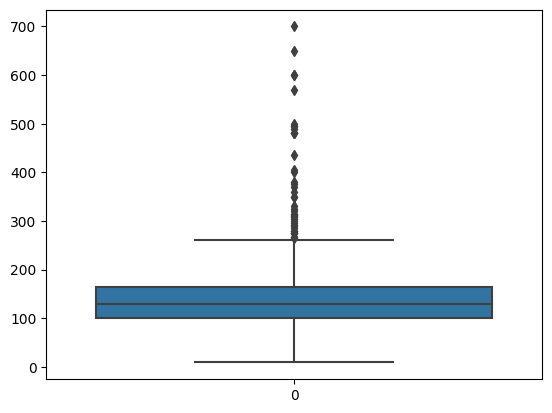

In [75]:
sns.boxplot(train['LoanAmount'])

In [72]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [76]:
tr=train.drop('Loan_ID',axis=1)

<Axes: >

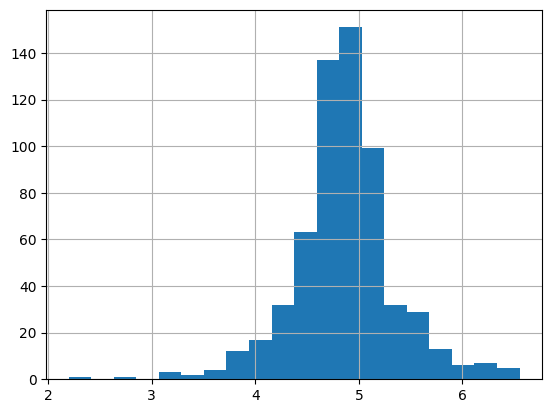

In [78]:
tr['updatedloanamount'] = np.log(tr['LoanAmount']) 
tr['updatedloanamount'].hist(bins=20) 

In [86]:
x=tr.drop('Loan_Status',1)
x

C:\Users\diyab\AppData\Local\Temp\ipykernel_312\2400282074.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=tr.drop('Loan_Status',1)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loanamtupdated,updatedloanamount
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,4.986426,4.986426
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,4.852030,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,4.189655,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,4.787492,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,4.948760,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,4.262680,4.262680
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,3.688879,3.688879
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,5.533389,5.533389
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,5.231109,5.231109


In [87]:
y=tr.Loan_Status
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [88]:
x=pd.get_dummies(x) 
tr=pd.get_dummies(train) 
tst=pd.get_dummies(test)


In [89]:
from sklearn.model_selection import train_test_split

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.597,random_state=101)

In [150]:
x_train.isnull()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loanamtupdated,updatedloanamount,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
245,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
350,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
182,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
599,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [151]:
y_train.isnull()

442    False
245    False
411    False
350    False
182    False
       ...  
75     False
599    False
575    False
337    False
523    False
Name: Loan_Status, Length: 247, dtype: bool

In [152]:
y_train

442    Y
245    N
411    Y
350    Y
182    Y
      ..
75     N
599    Y
575    Y
337    Y
523    Y
Name: Loan_Status, Length: 247, dtype: object

In [153]:
y_train.shape

(247,)

In [154]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [155]:
reg=LinearRegression()

In [156]:
regressor=LogisticRegression()

In [157]:
regressor.fit(x_train,y_train)

c:\Users\diyab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [158]:
prediction=regressor.predict(x_test)
prediction.shape

(367,)

In [159]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [160]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           N       0.65      0.47      0.54       118
           Y       0.78      0.88      0.83       249

    accuracy                           0.75       367
   macro avg       0.72      0.67      0.69       367
weighted avg       0.74      0.75      0.74       367



In [161]:
accuracy_score(y_test,prediction)

0.7493188010899182

In [162]:
prediction

array(['Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

Text(113.9222222222222, 0.5, 'Predicted Values')

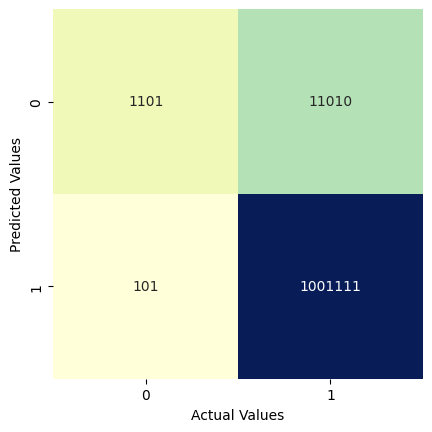

In [147]:
cm = confusion_matrix(y_test,prediction) 
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='b')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Reading and storing in a submission file

In [177]:
submit=pd.read_csv('sample_submission.csv')
submit.shape

(367, 2)

In [178]:
submit['Loan_Status']=prediction
submit

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,N


In [179]:
pd.DataFrame(submit,columns=['Loan_ID','Loan_Status']).to_csv('submission.csv',index=False)

Visualizing the submission dataframe

In [180]:
pd.read_csv('submission.csv')

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,N
